## Observations and Insights 

In [268]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()
#mouse_metadata.head()


# Combine the data into a single dataset
pyma_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
 
# Display the data table for preview
pyma_complete.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [269]:
# Checking the number of mice.

pyma_complete["Mouse ID"].nunique()


249

In [270]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pd.DataFrame(pyma_complete.loc[pyma_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique())


,0
0,g989


In [271]:
# Optional: Get all the data for the duplicate mouse ID. 
(pyma_complete.loc[pyma_complete["Mouse ID"]=="g989"])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [272]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = pyma_complete.loc[pyma_complete["Mouse ID"]!="g989"]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [273]:
# Checking the number of mice in the clean DataFrame.
clean_df = df["Mouse ID"].nunique()



## Summary Statistics

In [274]:
mice_mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mice_median = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mice_var = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mice_dev = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [275]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mice_median = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mice_var = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mice_dev = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Stat_sum = pd.DataFrame({
     'Mean': mice_mean,
     'Median': mice_median,
     'Variance': mice_var,
     'Standard Deviation': mice_dev,
     'SEM': sem
})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


Stat_sum





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [276]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean='mean', Median='median', Var='var', STD='std', SEM= 'sem')

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

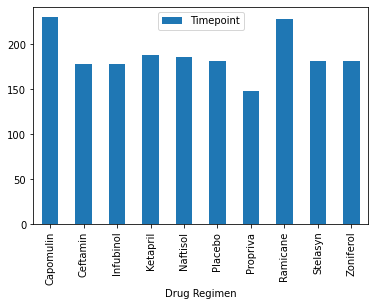

In [277]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_tp = (pd.DataFrame(df.groupby(['Drug Regimen'])['Timepoint'].count())).reset_index()
total_tp.plot.bar("Drug Regimen", "Timepoint")



In [278]:
total_tp

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


<BarContainer object of 10 artists>

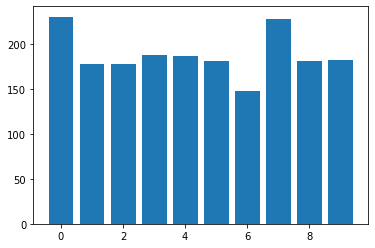

In [279]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_tp = (pd.DataFrame(df.groupby(['Drug Regimen'])['Timepoint'].count())).reset_index()
total_tp
#df["Drug Regimen"].value_counts(), total_tp
x_axis = np.arange(len(total_tp))
y_axis = total_tp["Timepoint"]
plt.bar(x_axis, y_axis)


In [280]:
sex_count

Male      125
Female    123
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Female Mice Versus Male Mice')

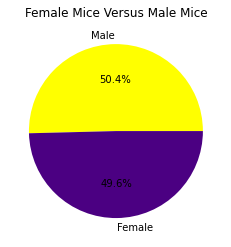

In [281]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mice = df.drop_duplicates(['Mouse ID'], keep='first')
sex_count = unique_mice["Sex"].value_counts()
genders = ("Male", "Female")
explode = (0,0)
colors = ("yellow", "indigo")

plt.pie(sex_count, explode=explode, labels = genders, colors=colors, autopct="%1.1f%%")
plt.title("Female Mice Versus Male Mice")

#colors = ( "orange", "cyan", "brown",
          #"grey", "indigo", "beige")



 


In [282]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [283]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [284]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [285]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [286]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [287]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [288]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
